# Rate Plots

## Setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def mich_menten(S, v_max=1, km=1):
    return v_max * S / (km + S)

def hill(S, v_max=1, kb=1, n=4):
    return v_max * kb * S**n / (1 + kb * S**n)

def mwc(S, vmax=1, kr=1, n=4, L=1):
    reg = 1 + L/((1 + kr*S)**n)
    reg = reg**-1
    
    return vmax * kr * S / (1 + kr * S) * reg

S = np.linspace(-0.1, 5, 1500)

## 4-1 a.

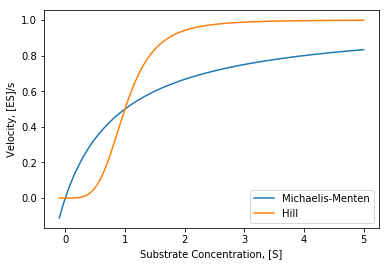

In [2]:
plt.ylabel("Velocity, [ES]/s")
plt.xlabel("Substrate Concentration, [S]")

plt.plot(S, mich_menten(S), label='Michaelis-Menten')
plt.plot(S, hill(S), label='Hill')
plt.legend(loc='lower right')
plt.show()

## 4-1 b.

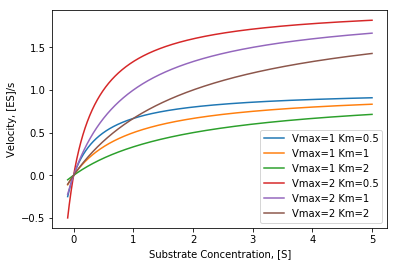

In [3]:
vmaxs = [1, 2]
kms = [0.5, 1, 2]
options = [(vm, km) for vm in vmaxs for km in kms]

plt.ylabel("Velocity, [ES]/s")
plt.xlabel("Substrate Concentration, [S]")

for op in options:
    plt.plot(S, mich_menten(S, *op), label=f"Vmax={op[0]} Km={op[1]}")
    
plt.legend(loc='lower right')

## 4-1 c.

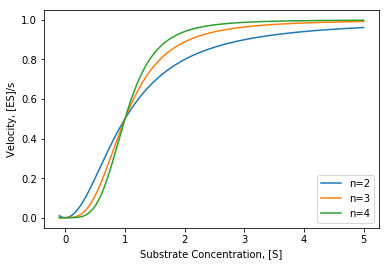

In [4]:
ns = [2, 3, 4]

plt.ylabel("Velocity, [ES]/s")
plt.xlabel("Substrate Concentration, [S]")

for n in ns:
    plt.plot(S, hill(S, n=n), label=f"n={n}")
             
plt.legend(loc='lower right')

## 4-1 d.

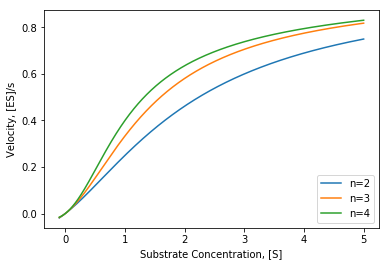

In [5]:
ns = [2, 3, 4]

plt.ylabel("Velocity, [ES]/s")
plt.xlabel("Substrate Concentration, [S]")

for n in ns:
    plt.plot(S, mwc(S, L=4, n=n), label=f"n={n}")
             
plt.legend(loc='lower right')

## 4-1 e.

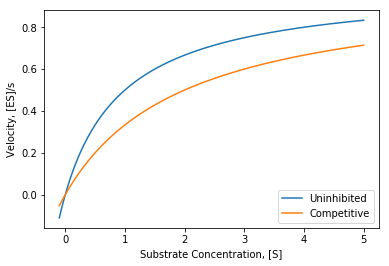

In [6]:
def competitive(S, vmax=1, km=1, i3=2):
    return mich_menten(S, vmax, km=km*i3)

plt.ylabel("Velocity, [ES]/s")
plt.xlabel("Substrate Concentration, [S]")

# competitive
plt.plot(S, mich_menten(S), label="Uninhibited")
plt.plot(S, competitive(S), label="Competitive")

plt.legend(loc='lower right')

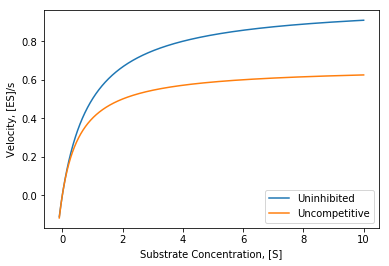

In [7]:
def uncompetitive(S, vmax=1, km=1, i4=1.5):
    return vmax*S / (km + S*i4)

S = np.linspace(-0.1, 10, 1500)

plt.ylabel("Velocity, [ES]/s")
plt.xlabel("Substrate Concentration, [S]")

# competitive
plt.plot(S, mich_menten(S), label="Uninhibited")
plt.plot(S, uncompetitive(S), label="Uncompetitive")

plt.legend(loc='lower right')

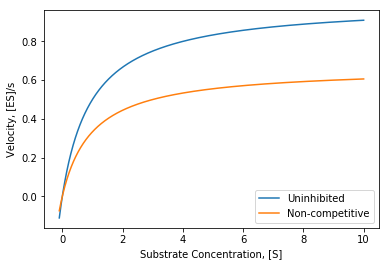

In [8]:
def noncompetitive(S, vmax=1, km=1, i3=1.5):
    return vmax*S / (i3 * (km + S))

S = np.linspace(-0.1, 10, 1500)

plt.ylabel("Velocity, [ES]/s")
plt.xlabel("Substrate Concentration, [S]")

# competitive
plt.plot(S, mich_menten(S), label="Uninhibited")
plt.plot(S, noncompetitive(S), label="Non-competitive")

plt.legend(loc='lower right')

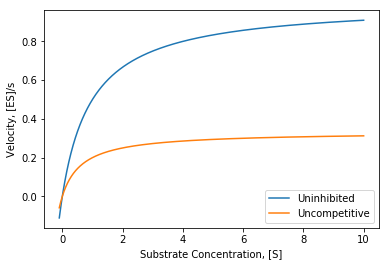

In [9]:
def mixed(S, vmax=1, km=1, i3=3, i4=2):
    return vmax*S / (i4*km + i3*S)

S = np.linspace(-0.1, 10, 1500)

plt.ylabel("Velocity, [ES]/s")
plt.xlabel("Substrate Concentration, [S]")

# competitive
plt.plot(S, mich_menten(S), label="Uninhibited")
plt.plot(S, mixed(S), label="Uncompetitive")

plt.legend(loc='lower right')

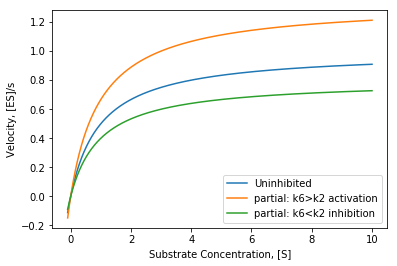

In [10]:
def partial(S, k6, k2, vmax=1, km=1, i3=2, i4=2):
    return mixed(S, vmax, km, i3, i4)*(1 + k6*1/(k2*1))

S = np.linspace(-0.1, 10, 1500)

plt.ylabel("Velocity, [ES]/s")
plt.xlabel("Substrate Concentration, [S]")

# competitive
plt.plot(S, mich_menten(S), label="Uninhibited")
plt.plot(S, partial(S, k6=2, k2=1.2), label="partial: k6>k2 activation")
plt.plot(S, partial(S, k6=1.2, k2=2), label="partial: k6<k2 inhibition")

plt.legend(loc='lower right')